In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import date
import matplotlib as mpl

# LAB 07: Probability
## IMDB 5000 Movies Dataset
## Keith Eckert 3-27-18

In [2]:
imdb = pd.read_csv('./data/movie_metadata.csv')
imdb = imdb.drop_duplicates()

In [56]:
imdb.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,net,ratio
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,286505847.0,3.208885
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,-290595848.0,1.031347


In [4]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 28 columns):
color                        4979 non-null object
director_name                4895 non-null object
num_critic_for_reviews       4949 non-null float64
duration                     4983 non-null float64
director_facebook_likes      4895 non-null float64
actor_3_facebook_likes       4975 non-null float64
actor_2_name                 4985 non-null object
actor_1_facebook_likes       4991 non-null float64
gross                        4124 non-null float64
genres                       4998 non-null object
actor_1_name                 4991 non-null object
movie_title                  4998 non-null object
num_voted_users              4998 non-null int64
cast_total_facebook_likes    4998 non-null int64
actor_3_name                 4975 non-null object
facenumber_in_poster         4985 non-null float64
plot_keywords                4846 non-null object
movie_imdb_link              4998 non-

### i. What's the probability that a movie was longer than an hour and a half? Two hours?

In [5]:
over90 = imdb[imdb.duration > 90]
counter = imdb['duration'].count()
(over90['duration'].count() / counter)


0.8101545253863135

In [6]:
over120 = imdb[imdb.duration > 120]
counter = imdb['duration'].count()
(over120['duration'].count() / counter)

0.21312462372065022

### ii. What's the probability that a movie was directed by Steven Spielberg?

In [7]:
steven = imdb[imdb.director_name == 'Steven Spielberg']
counter = imdb['director_name'].count()
steven['director_name'].count() / counter

0.005311542390194076

### iii. What's the probability that a movie directed by Clint Eastwood will gross under budget?


In [8]:
imdb['profit'] = imdb['gross'] - imdb['budget']
clint = imdb[imdb.director_name == 'Clint Eastwood']
counter = clint.profit.count()
# counter
clintunder = clint.profit[clint.profit < 0].count() / counter
print('Pobability of Clint Eastwood grossing under budget => {:.2f}'.format(clintunder)) 


Pobability of Clint Eastwood grossing under budget => 0.37


### iv. What is the probability tht a movie generally grossed more than its budget?

In [57]:
prof = imdb['profit']
budg = imdb['budget']
x = imdb[imdb.profit > 0].shape[0]
y = imdb.color.count()
print(x/y)


0.4081140791323559


### v. what is the probablility that a movie grossed over the average gross of this dataset?

In [58]:
gross_avg = imdb.gross.mean()
imdb[imdb.gross > gross_avg].shape[0] / imdb.color.count()

0.26431010243020686

### vi. For ratings we'll consider a movie with at least a 6/10 to be worth renting, if not seeing in theaters. A false positive would be a movie that was highly-rated but did poorly in the box office (gross < budget). A false negative would be a movie that was poorly-rated but did great in the box office (gross > budget).

In [59]:
imdb['net'] = imdb['profit'] - imdb['budget']
false_pos = imdb.query('imdb_score >= 6 and net <= 0')
false_pos.imdb_score.count()

1920

In [60]:

false_neg = imdb.query('imdb_score <= 6 and net >= 0')
false_neg.imdb_score.count()

253

### vii. in the IMDB dataser, what are the false positive and false negative rates?

In [61]:
# false positive
false_pos.imdb_score.count() / imdb.color.count()

0.3856196023297851

In [14]:
# false negative
false_neg.imdb_score.count() / imdb.color.count()

0.05081341634866439

### viii If I’m a production studio exec and Tom Hanks is starring in my movie but I’m feeling uncertain about whether we should keep him (will he make as much money as we want?), tell me should I keep him in the movie or switch him out for Harrison Ford?


In [15]:
tommy = imdb[(imdb.actor_1_name == 'Tom Hanks') | (imdb.actor_2_name == 'Tom Hanks') | (imdb.actor_3_name == 'Tom Hanks')]['profit'].sum()
tcount = imdb[(imdb.actor_1_name == 'Tom Hanks') | (imdb.actor_2_name == 'Tom Hanks') | (imdb.actor_3_name == 'Tom Hanks')]

tcount = tcount.color.count()
tprof = tommy / tcount
print('tom hanks profit per film => {}'.format(tprof))

tom hanks profit per film => 61737401.53571428


In [16]:
ford = imdb[(imdb.actor_1_name == 'Harrison Ford') | (imdb.actor_2_name == 'Harrison Ford') | (imdb.actor_3_name == 'Harrison Ford')]['profit'].sum()
fcount = imdb[(imdb.actor_1_name == 'Harrison Ford') | (imdb.actor_2_name == 'Harrison Ford') | (imdb.actor_3_name == 'Harrison Ford')]
fcount = fcount.color.count()
fprof = ford / fcount
print('Harrison Ford profit => {}'.format(fprof))

Harrison Ford profit => 70338494.31034483


In [17]:
final = fprof - tprof
print('Harrison Ford avearages ${} more per film'.format(final))

Harrison Ford avearages $8601092.774630547 more per film


### ix. Same as above, but I’m judging on the ratings of the movie instead of the gross/budget.

In [18]:
tom = imdb[(imdb.actor_1_name == 'Tom Hanks') | (imdb.actor_2_name == 'Tom Hanks') | (imdb.actor_3_name == 'Tom Hanks')]['imdb_score'].mean()
tom

7.3999999999999995

In [19]:
ford = imdb[(imdb.actor_1_name == 'Harrison Ford') | (imdb.actor_2_name == 'Harrison Ford') | (imdb.actor_3_name == 'Harrison Ford')]['imdb_score'].mean()
ford

7.075862068965518

In [20]:
print('tom hanks has a better average rating over harrison ford. {} to {}'.format(tom,ford))

tom hanks has a better average rating over harrison ford. 7.3999999999999995 to 7.075862068965518


### x. What’s the probability that a movie’s length will be between 1hr 10mins and 1h 30mins?

In [21]:
filmcount = imdb.shape[0]
[imdb[imdb.duration <= 90][imdb.duration >= 70].shape[0] / filmcount]

/Users/keith/codefellows/401/lab/data_science/ENV/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[0.1644657863145258]

### xi. How does the distribution of movie budgets compare to the movie gross values?


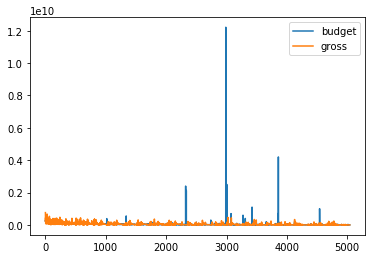

In [22]:
gbud = imdb.query('budget != "NaN" and gross != "NaN"')
gbud[['budget', 'gross']].plot()

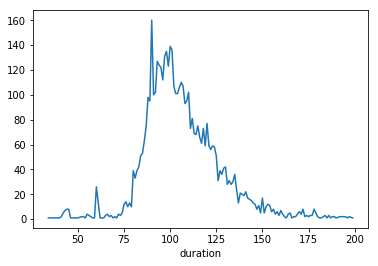

In [23]:
imdb.duration[(imdb.duration < 200) & (imdb.duration > 30)].groupby(imdb.duration).count().plot()

### xii. Which genre trends toward the highest gross-to-budget ratio? You may have to do some extra parsing to answer this question.

In [37]:
imdb['ratio'] = imdb['gross'] / imdb['budget']
g = imdb[['genres','ratio']].groupby(imdb.genres)
genres.head(5)


,genres,ratio
0,Action|Adventure|Fantasy|Sci-Fi,3.208885
1,Action|Adventure|Fantasy,1.031347
2,Action|Adventure|Thriller,0.816629
3,Action|Thriller,1.792523
4,Documentary,NaN


### xiii. Nicolas Cage is known for starring in some pretty bad movies. Are his movies statistically significantly worse (i.e. in rating) than the rest of the IMDB 5000+?

In [46]:
nc = imdb.query('actor_1_name == "Nicolas Cage"')
# nc.head(2)

In [47]:
not_nc = imdb.query('actor_1_name != "Nicolas Cage"')
# not_nc.head(2)

In [45]:
z = nc.imdb_score.mean() - not_nc.imdb_score.mean()
print('nick cage movies average {} points lower imdb_score than average'.format(z))


nick cage movies average -0.23002919855013992 points lower imdb_score than average


### xiv. Have any years grossed a statistically-significant higher amount than the other years?

[]

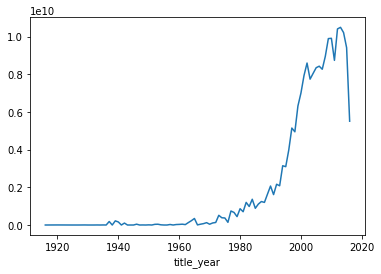

In [52]:
yearlygross = imdb['gross'].groupby(imdb.title_year).sum().plot(kind='line')
#yearlygross
yearlygross.set()

In [53]:
#i don't think all we can extapolate is a uprard trend by the past few decades, not a specific year.

### Plot of movie duration


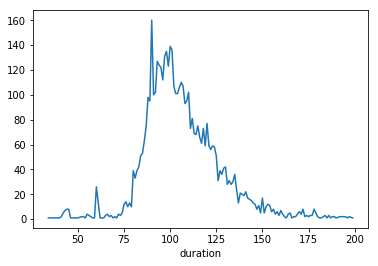

In [55]:
#from class
imdb.duration[(imdb.duration < 200) & (imdb.duration > 30)].groupby(imdb.duration).count().plot()